In [0]:
#Name: Shreyas Patil
#USC ID Number: 3220932311
#USC Email: shreyasp@usc.edu
#Submission Date: 4/7/2019

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
use_cuda = True

In [0]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=25, shuffle=True, num_workers=6)

testloader = torch.utils.data.DataLoader(testset, batch_size=25, shuffle=False, num_workers=6)

0it [00:00, ?it/s]

9920512it [00:01, 8758724.47it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 134446.71it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2199198.15it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 50555.64it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


Defining Network(Setting 1)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x 
    
      
network = Net()

Defining optimization method loss function

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)

Training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


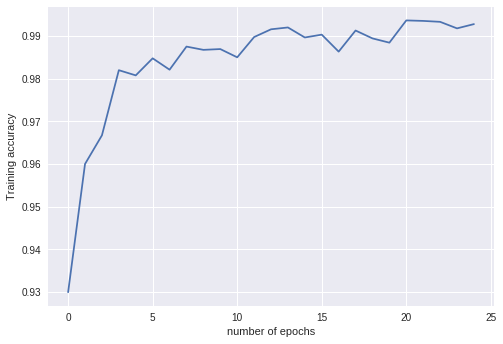

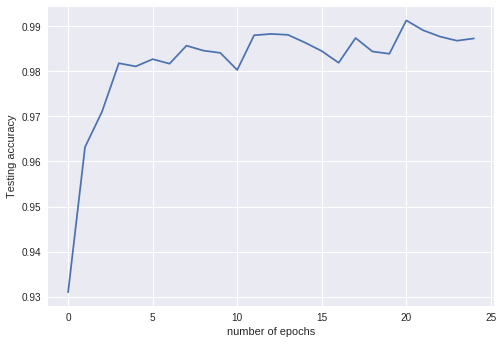

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
network = network.to(device)
accuracy11 = []
accuracy12 = []
for epoch in range(25):  
    total1 = 0
    correct1 = 0
    total2 = 0
    correct2 = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()           #Calculating the gradients
        optimizer.step()     #Updates the parameters
       
        #Plotting training accuracy

    for traindata in trainloader:
        data, labels = traindata
        data, labels = data.to(device), labels.to(device)
        outputs = network(data)
        _, predicted = torch.max(outputs, 1)
        total1 += labels.size(0)
        correct1 += (predicted == labels).sum().item()
        
#         newoutputs1 = network(inputs)
#         _, predicted = torch.max(newoutputs1, 1)
#         total1 += labels.size(0)
#         correct1 += (predicted == labels).sum().item()
    
    accuracy11.append(correct1 / total1)
    

    for testdata in testloader:
      data, labels = testdata
      data, labels = data.to(device), labels.to(device)
      outputs = network(data)
      _, predicted = torch.max(outputs, 1)
      total2 += labels.size(0)
      correct2 += (predicted == labels).sum().item()
      
    accuracy12.append(correct2 / total2)
      


plt.plot(range(25), accuracy11) 
plt.xlabel("number of epochs")
plt.ylabel("Training accuracy")
plt.show()

plt.plot(range(25), accuracy12)
plt.xlabel("number of epochs")
plt.ylabel("Testing accuracy")
plt.show()

In [0]:
accuracy12

[0.931,
 0.9632,
 0.971,
 0.9818,
 0.9811,
 0.9827,
 0.9817,
 0.9857,
 0.9846,
 0.9841,
 0.9803,
 0.988,
 0.9883,
 0.9881,
 0.9864,
 0.9845,
 0.9819,
 0.9874,
 0.9844,
 0.9839,
 0.9913,
 0.9891,
 0.9877,
 0.9868,
 0.9873]

Setting 2 (cahnging number of filters for 1st convolutional layer)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x 
    
      
network = Net()

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


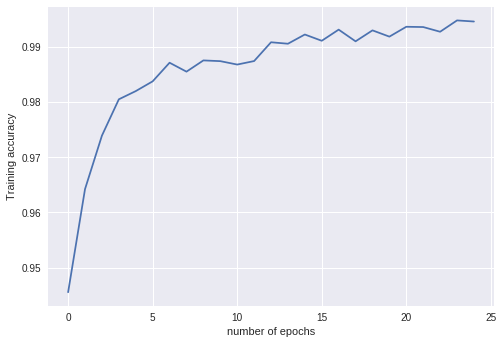

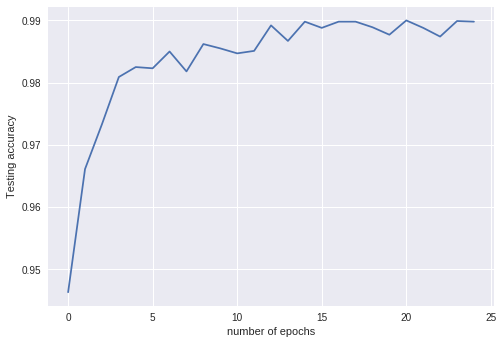

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
network = network.to(device)
accuracy21 = []
accuracy22 = []
for epoch in range(25):  
    total1 = 0
    correct1 = 0
    total2 = 0
    correct2 = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()           #Calculating the gradients
        optimizer.step()     #Updates the parameters
       
        #Plotting training accuracy
    for traindata in trainloader:
        data, labels = traindata
        data, labels = data.to(device), labels.to(device)
        outputs = network(data)
        _, predicted = torch.max(outputs, 1)
        total1 += labels.size(0)
        correct1 += (predicted == labels).sum().item()    
     
#         newoutputs1 = network(inputs)
#         _, predicted = torch.max(newoutputs1, 1)
#         total1 += labels.size(0)
#         correct1 += (predicted == labels).sum().item()
    
    accuracy21.append(correct1 / total1)
    

    for testdata in testloader:
      data, labels = testdata
      data, labels = data.to(device), labels.to(device)
      outputs = network(data)
      _, predicted = torch.max(outputs, 1)
      total2 += labels.size(0)
      correct2 += (predicted == labels).sum().item()
      
    accuracy22.append(correct2 / total2)
      


plt.plot(range(25), accuracy21) 
plt.xlabel("number of epochs")
plt.ylabel("Training accuracy")
plt.show()

plt.plot(range(25), accuracy22) 
plt.xlabel("number of epochs")
plt.ylabel("Testing accuracy")
plt.show()

In [0]:
accuracy22

[0.9463,
 0.9661,
 0.9733,
 0.9809,
 0.9825,
 0.9823,
 0.985,
 0.9818,
 0.9862,
 0.9855,
 0.9847,
 0.9851,
 0.9892,
 0.9867,
 0.9898,
 0.9888,
 0.9898,
 0.9898,
 0.9889,
 0.9877,
 0.99,
 0.9888,
 0.9874,
 0.9899,
 0.9898]

Setting 3 (Batch size changed)

In [0]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=160, shuffle=True, num_workers=6)

testloader = torch.utils.data.DataLoader(testset, batch_size=160, shuffle=False, num_workers=6)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x 
network = Net()

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


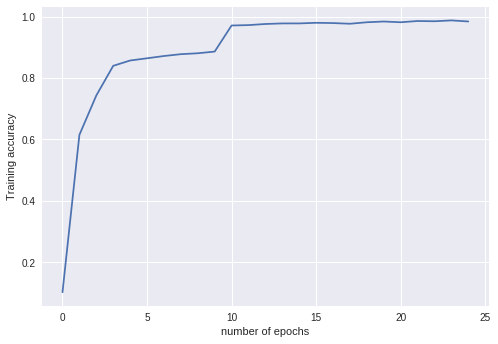

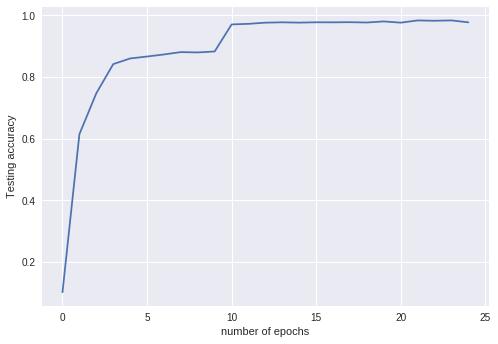

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
network = network.to(device)
accuracy31 = []
accuracy32 = []
for epoch in range(25):  
    total1 = 0
    correct1 = 0
    total2 = 0
    correct2 = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()           #Calculating the gradients
        optimizer.step()     #Updates the parameters
       
    for traindata in trainloader:
        data, labels = traindata
        data, labels = data.to(device), labels.to(device)
        outputs = network(data)
        _, predicted = torch.max(outputs, 1)
        total1 += labels.size(0)
        correct1 += (predicted == labels).sum().item()     
     
#         newoutputs1 = network(inputs)
#         _, predicted = torch.max(newoutputs1, 1)
#         total1 += labels.size(0)
#         correct1 += (predicted == labels).sum().item()
    
    accuracy31.append(correct1 / total1)
    

    for testdata in testloader:
      data, labels = testdata
      data, labels = data.to(device), labels.to(device)
      outputs = network(data)
      _, predicted = torch.max(outputs, 1)
      total2 += labels.size(0)
      correct2 += (predicted == labels).sum().item()
      
    accuracy32.append(correct2 / total2)
      


plt.plot(range(25), accuracy31) 
plt.xlabel("number of epochs")
plt.ylabel("Training accuracy")
plt.show()

plt.plot(range(25), accuracy32) 
plt.xlabel("number of epochs")
plt.ylabel("Testing accuracy")
plt.show()

In [0]:
accuracy1

NameError: ignored

Setting 4 (optimizer changed)

In [0]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=25, shuffle=True, num_workers=6)

testloader = torch.utils.data.DataLoader(testset, batch_size=25, shuffle=False, num_workers=6)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x 
    
      
network = Net()

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(network.parameters())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


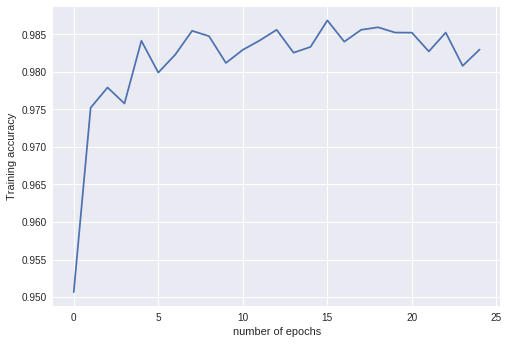

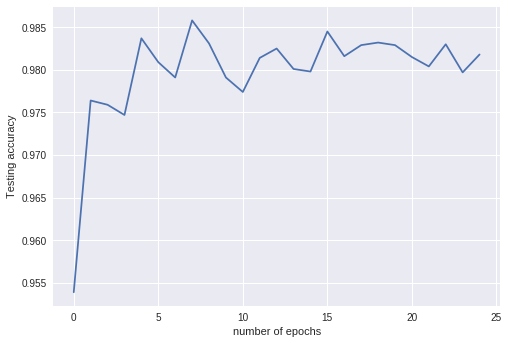

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
network = network.to(device)
accuracy41 = []
accuracy42 = []
for epoch in range(25):  
    total1 = 0
    correct1 = 0
    total2 = 0
    correct2 = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()           #Calculating the gradients
        optimizer.step()     #Updates the parameters
       
    for traindata in trainloader:
        data, labels = traindata
        data, labels = data.to(device), labels.to(device)
        outputs = network(data)
        _, predicted = torch.max(outputs, 1)
        total1 += labels.size(0)
        correct1 += (predicted == labels).sum().item() 
        
#         newoutputs1 = network(inputs)
#         _, predicted = torch.max(newoutputs1, 1)
#         total1 += labels.size(0)
#         correct1 += (predicted == labels).sum().item()
    
    accuracy41.append(correct1 / total1)
    

    for testdata in testloader:
      data, labels = testdata
      data, labels = data.to(device), labels.to(device)
      outputs = network(data)
      _, predicted = torch.max(outputs, 1)
      total2 += labels.size(0)
      correct2 += (predicted == labels).sum().item()
      
    accuracy42.append(correct2 / total2)
      


plt.plot(range(25), accuracy41) 
plt.xlabel("number of epochs")
plt.ylabel("Training accuracy")
plt.show()

plt.plot(range(25), accuracy42) 
plt.xlabel("number of epochs")
plt.ylabel("Testing accuracy")
plt.show()

In [0]:
accuracy41

Setting 5 (filter size changed in both convolutional layers)

In [0]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=25, shuffle=True, num_workers=6)

testloader = torch.utils.data.DataLoader(testset, batch_size=25, shuffle=False, num_workers=6)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*6*6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x 
    
      
network = Net()

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


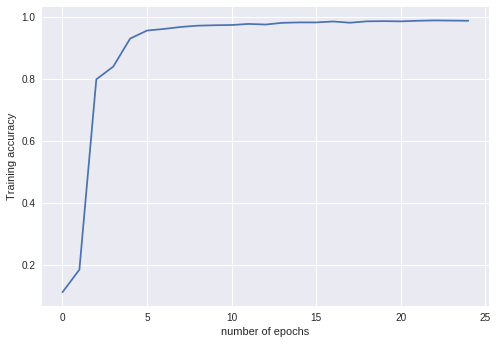

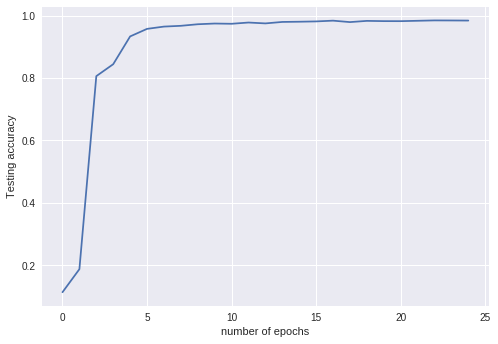

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
network = network.to(device)
accuracy51 = []
accuracy52 = []
for epoch in range(25):  
    total1 = 0
    correct1 = 0
    total2 = 0
    correct2 = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()           #Calculating the gradients
        optimizer.step()     #Updates the parameters
       
    for traindata in trainloader:
        data, labels = traindata
        data, labels = data.to(device), labels.to(device)
        outputs = network(data)
        _, predicted = torch.max(outputs, 1)
        total1 += labels.size(0)
        correct1 += (predicted == labels).sum().item() 
        
#         newoutputs1 = network(inputs)
#         _, predicted = torch.max(newoutputs1, 1)
#         total1 += labels.size(0)
#         correct1 += (predicted == labels).sum().item()
    
    accuracy51.append(correct1 / total1)
    

    for testdata in testloader:
      data, labels = testdata
      data, labels = data.to(device), labels.to(device)
      outputs = network(data)
      _, predicted = torch.max(outputs, 1)
      total2 += labels.size(0)
      correct2 += (predicted == labels).sum().item()
      
    accuracy52.append(correct2 / total2)
      


plt.plot(range(25), accuracy51) 
plt.xlabel("number of epochs")
plt.ylabel("Training accuracy")
plt.show()

plt.plot(range(25), accuracy52) 
plt.xlabel("number of epochs")
plt.ylabel("Testing accuracy")
plt.show()

In [0]:
accuracy51

Calculating mean and variance of 5 parameter settings

In [0]:
acctrain = np.array([accuracy11[24], accuracy21[24], accuracy31[24], accuracy41[24], accuracy51[24]])
acctest = np.array([accuracy12[24], accuracy22[24], accuracy32[24], accuracy42[24], accuracy52[24]])

In [0]:
acctest

array([0.9873, 0.9898, 0.9776, 0.9818, 0.984 ])

In [0]:
acctrain

array([0.99276667, 0.99453333, 0.98395   , 0.98296667, 0.98741667])

In [0]:
meantrain = np.mean(acctrain)
meantest = np.mean(acctest)
vartrain = np.var(acctrain)
vartest = np.var(acctest)

In [0]:
vartest